# Automobile Analysis

This project analyzes the dataset which consists of 205 rows and 26 columns of data related to various features of automobiles. The columns include information such as make, body style, engine type, horsepower, price, and more. This dataset can be used for various analytical purposes such as predictive modeling, data summarization, and data visualization.

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

The dataset used in this project has been downloaded from kaggle using the link https://www.kaggle.com/datasets/tawfikelmetwally/automobile-dataset

> Instructions for downloading the dataset (delete this cell)
>
> - Find an interesting dataset on this page: https://www.kaggle.com/datasets?fileType=csv
> - The data should be in CSV format, and should contain at least 3 columns and 150 rows
> - Download the dataset using the [`opendatasets` Python library](https://github.com/JovianML/opendatasets#opendatasets)

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [3]:
dataset_url = 'https://www.kaggle.com/datasets/tawfikelmetwally/automobile-dataset' 

In [4]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kevinreuben15
Your Kaggle Key: ········


100%|██████████| 6.45k/6.45k [00:00<00:00, 4.50MB/s]

The dataset has been downloaded and extracted.

In [7]:
data_dir = './automobile-dataset'

In [8]:
import os
os.listdir(data_dir)

['Automobile.csv']

Let us save and upload our work to Jovian before continuing.

In [9]:
project_name = "Data-Analysis-on-Automobiles"

In [10]:
!pip install jovian --upgrade -q

In [11]:
import jovian

In [12]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Creating a new project "kevinreuben15/Data-Analysis-on-Automobiles"
[jovian] Committed successfully! https://jovian.com/kevinreuben15/data-analysis-on-automobiles


'https://jovian.com/kevinreuben15/data-analysis-on-automobiles'

## Data Preparation and Cleaning

In this section we will deal with displaying specified data, manipulation of data and altering the displayed tables.



In [53]:
import pandas as pd
car_df=pd.read_csv(r'https://raw.githubusercontent.com/kevcodes15/repo2/main/Automobile.csv')

In [54]:
from IPython.display import display
with pd.option_context('display.max_columns',50):
    display(car_df)  

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,usa
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,usa
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,usa


In [55]:
car_df = car_df.loc[0:159]   #choosing how many rows to display

In [57]:
car_df=car_df[['name','mpg','cylinders','displacement','horsepower','model_year','origin']]    #choosing which columns to display    

In [58]:
car_df  #displaying the new table with specified columns and rows

,name,mpg,cylinders,displacement,horsepower,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,70,usa
4,ford torino,17.0,8,302.0,140.0,70,usa
...,...,...,...,...,...,...,...
155,ford maverick,15.0,6,250.0,72.0,75,usa
156,pontiac catalina,16.0,8,400.0,170.0,75,usa
157,chevrolet bel air,15.0,8,350.0,145.0,75,usa
158,plymouth grand fury,16.0,8,318.0,150.0,75,usa


In [59]:
car_df['mpg/cylinders']= car_df['mpg'] / car_df['cylinders'] #creating a new column

In [60]:
car_df

,name,mpg,cylinders,displacement,horsepower,model_year,origin,mpg/cylinders
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,70,usa,2.250
1,buick skylark 320,15.0,8,350.0,165.0,70,usa,1.875
2,plymouth satellite,18.0,8,318.0,150.0,70,usa,2.250
3,amc rebel sst,16.0,8,304.0,150.0,70,usa,2.000
4,ford torino,17.0,8,302.0,140.0,70,usa,2.125
...,...,...,...,...,...,...,...,...
155,ford maverick,15.0,6,250.0,72.0,75,usa,2.500
156,pontiac catalina,16.0,8,400.0,170.0,75,usa,2.000
157,chevrolet bel air,15.0,8,350.0,145.0,75,usa,1.875
158,plymouth grand fury,16.0,8,318.0,150.0,75,usa,2.000


In [61]:
import jovian

In [62]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "kevinreuben15/data-analysis-on-automobiles" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/kevinreuben15/data-analysis-on-automobiles


'https://jovian.com/kevinreuben15/data-analysis-on-automobiles'

## Exploratory Analysis and Visualization

Following are the visualizations using different plots of matplotlib as well as seaborn



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [63]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In the below codes, we create a scatterplot of the displacement against the miles per gallon

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

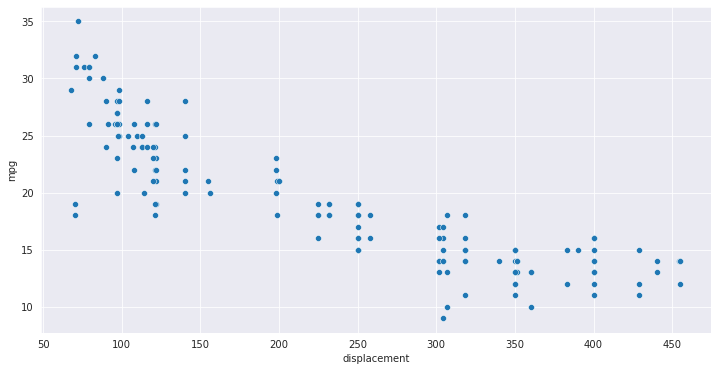

In [65]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=car_df.displacement, y=car_df.mpg);

Here we are plotting 'name' against 'mpg' but as we can see this is not meaningful

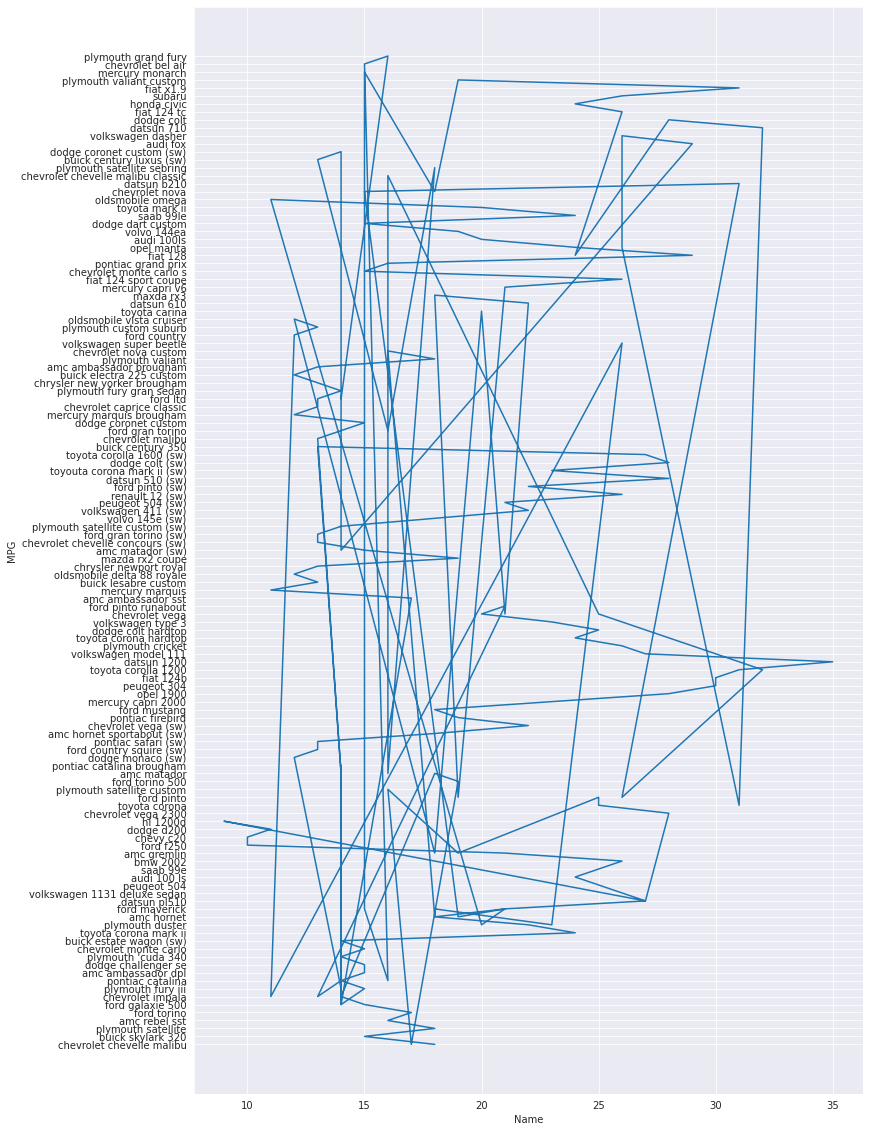

In [66]:
plt.figure(figsize=(12, 20))
plt.plot(car_df['mpg'],car_df['name']);
plt.xlabel('Name')
plt.ylabel("MPG");

So to make it meaningful, we can use a bar plot

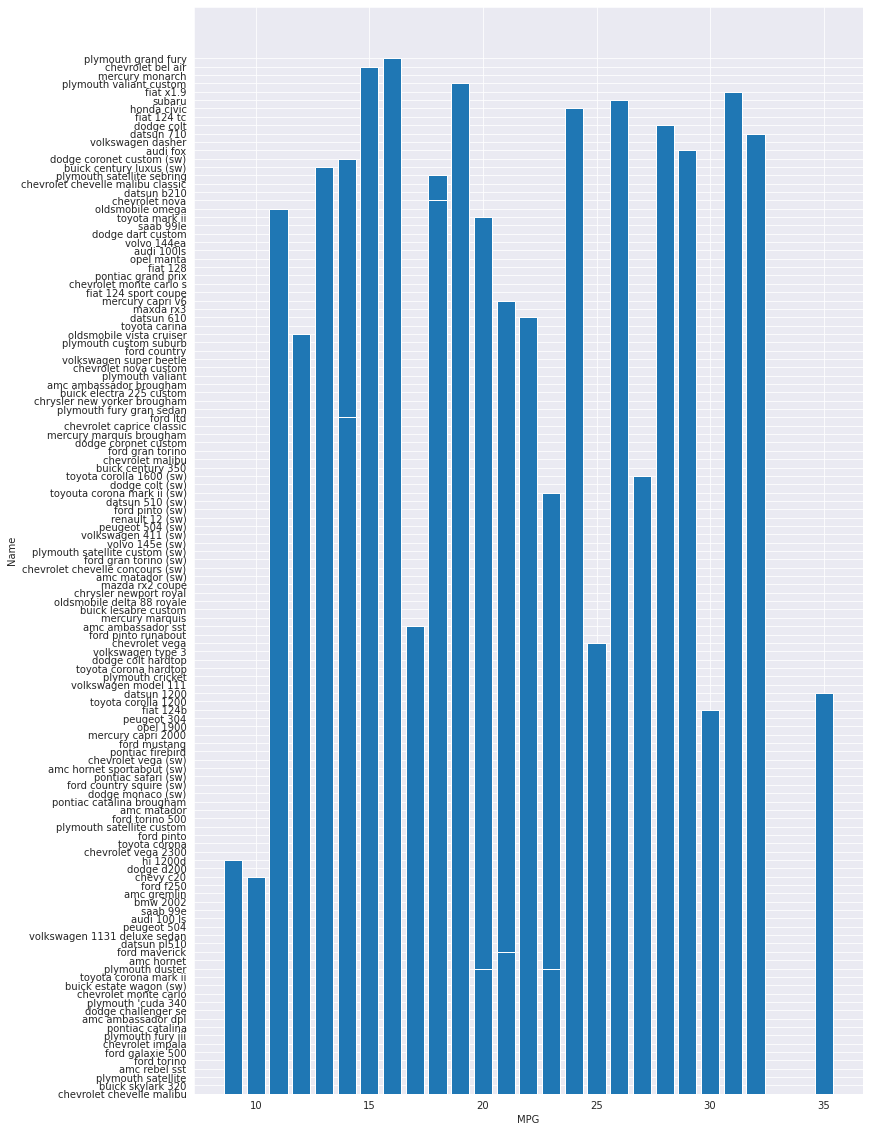

In [68]:
plt.figure(figsize=(12, 20))
plt.bar(car_df['mpg'],car_df['name']);
plt.xlabel('MPG')
plt.ylabel("Name");

In this plot we have created a bar chart to visualize how the horsepower value varies across different displacements

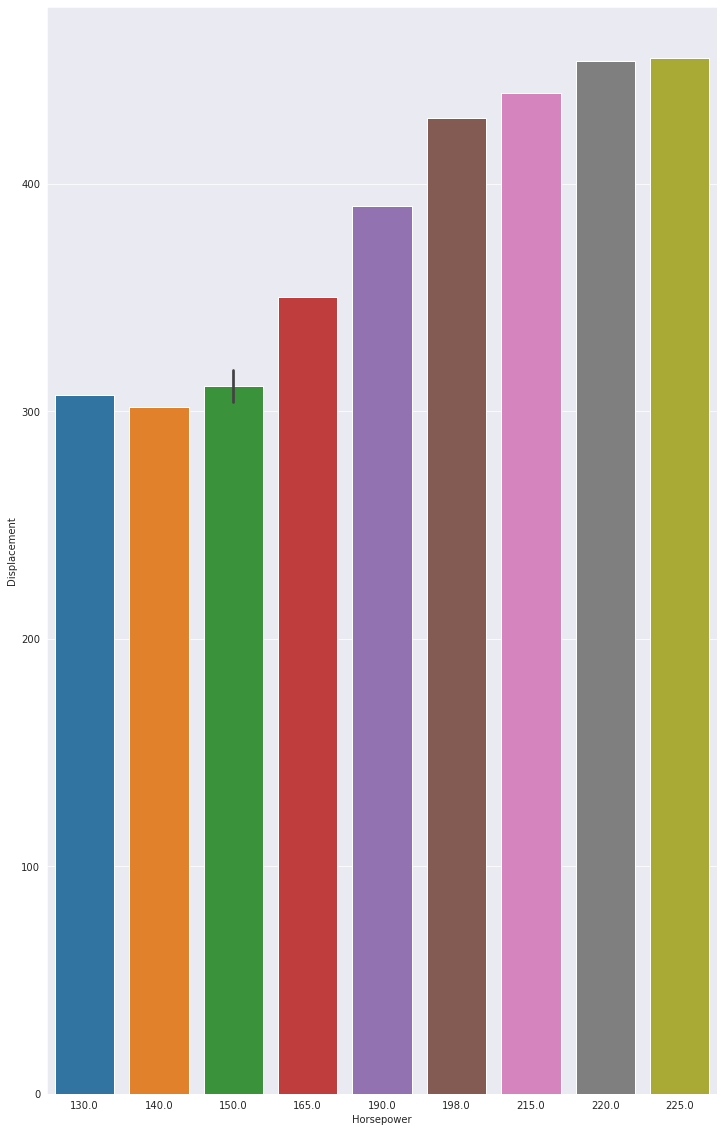

In [77]:
plt.figure(figsize=(12, 20))
sns.barplot(x='horsepower',y='displacement',data=car_df[0:10]);
plt.xlabel('Horsepower')
plt.ylabel("Displacement");

Let us save and upload our work to Jovian before continuing

In [78]:
import jovian

In [79]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "kevinreuben15/data-analysis-on-automobiles" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/kevinreuben15/data-analysis-on-automobiles


'https://jovian.com/kevinreuben15/data-analysis-on-automobiles'

## Asking and Answering Questions

Some important and interesting questions can be asked and answered using the dataset



#### Q1: Display the car details of the car model 'Chevrolet chevelle malibu'

In [85]:
car=car_df[car_df.name=='chevrolet chevelle malibu']

In [86]:
car

,name,mpg,cylinders,displacement,horsepower,model_year,origin,mpg/cylinders
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,70,usa,2.250000
35,chevrolet chevelle malibu,17.0,6,250.0,100.0,71,usa,2.833333


#### Q2: Display a list of 'Ford Mavericks' having a MPG greater than 10

In [93]:
car = car_df[(car_df.name=='ford maverick') & (car_df.mpg>10)]

In [94]:
car

,name,mpg,cylinders,displacement,horsepower,model_year,origin,mpg/cylinders
17,ford maverick,21.0,6,200.0,85.0,70,usa,3.5
100,ford maverick,18.0,6,250.0,88.0,73,usa,3.0
126,ford maverick,21.0,6,200.0,NaN,74,usa,3.5
155,ford maverick,15.0,6,250.0,72.0,75,usa,2.5


#### Q3: What is the maximum horsepower recorded

In [95]:
car_df.horsepower.max()

230.0

#### Q4: What is the total displacement of cars made in the USA

In [108]:
total_displacement_usa_cars = car_df[car_df.origin == 'usa'].displacement.sum()


In [109]:
total_displacement_usa_cars

32658.5

#### Q5:What is the range of model years in the dataset?

In [110]:
range_years = car_df['model_year'].max() - car_df['model_year'].min()

In [111]:
range_years

5

Let us save and upload our work to Jovian before continuing.

In [112]:
import jovian

In [113]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "kevinreuben15/data-analysis-on-automobiles" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/kevinreuben15/data-analysis-on-automobiles


'https://jovian.com/kevinreuben15/data-analysis-on-automobiles'

## Inferences and Conclusion

In conclusion, we can see that Fuel efficiency (mpg) varies widely across the cars in the dataset and that American cars have a larger displacement than cars made in other regions, based on the available data.

Overall, this dataset provides some interesting insights into the automotive industry and can help researchers and analysts in decision-making and planning related to automobiles.

In [114]:
import jovian

In [115]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "kevinreuben15/data-analysis-on-automobiles" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/kevinreuben15/data-analysis-on-automobiles


'https://jovian.com/kevinreuben15/data-analysis-on-automobiles'

## References and Future Work

Some ideas for future projects using this dataset can be MPG Prediction and a Car Recommendation System.

In [116]:
import jovian

In [117]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "kevinreuben15/data-analysis-on-automobiles" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/kevinreuben15/data-analysis-on-automobiles


'https://jovian.com/kevinreuben15/data-analysis-on-automobiles'